In [1]:
# Cosas varias de forma

%matplotlib inline
from IPython import embed
from IPython.display import display

# Carga cosas necesarias
from graficos import *
from loadUmbral import *
from DownloadFile import *
from plotConvergencia import *
from Scripts import *

# Carga la configuracion
settings = {}
settings['FilterCodeVersion'] = 12 # 0 es sin filtro
settings['FilterLevelVersion'] = 0 # 0 es sin filtro
settings['FilterResourcesVersion'] = 0 # 0 es sin filtro
settings['ShowTimeline'] = True
settings['ShowPlotsPorLevel'] = True

In [ ]:
# Rutina para chequear que los datos en tiempo real
DownloadFile()
touchs, sounds = load(settings)
#makeTimeline(touchs, sounds)
plotConvergencia(touchs)
plotResumen(buscarUmbral(touchs))
buscarUmbral(touchs)

,AnguloReferencia,MediaDeltaTita,DesviacionDeltaTita,CumpleCriterioCola,Session,Usuario,Level,LevelVersion,Identificador
0,0,1.253565,0.054505,True,2015-11-30 16:17:53.375999,Usr1,2015-11-30 16:17:55.332999,18,Medicion2
1,0,3.291479,0.400641,False,2015-11-30 16:24:04.739000,Usr2,2015-11-30 16:24:09.835000,18,Medicion2
2,10,3.264998,0.269689,True,2015-11-30 16:24:04.739000,Usr2,2015-11-30 16:35:45.188999,18,Medicion2
3,20,4.581339,0.271201,True,2015-11-30 16:24:04.739000,Usr2,2015-11-30 16:44:09.336999,18,Medicion2
4,30,3.501357,0.321667,True,2015-11-30 16:24:04.739000,Usr2,2015-11-30 17:01:14.698999,18,Medicion2
5,40,1.976500,0.091459,True,2015-11-30 17:08:56.480000,Usr2,2015-11-30 17:09:00.165999,18,Medicion2
6,50,3.903401,0.202632,True,2015-11-30 17:08:56.480000,Usr2,2015-11-30 17:14:02.457999,18,Medicion2
7,60,4.106107,0.124194,True,2015-11-30 17:08:56.480000,Usr2,2015-11-30 17:20:01.625000,18,Medicion2
8,70,1.352589,0.153538,True,2015-11-30 17:08:56.480000,Usr2,2015-11-30 17:27:08.546000,18,Medicion2
9,80,1.048296,0.041707,True,2015-11-30 17:08:56.480000,Usr2,2015-11-30 17:30:50.338000,18,Medicion2


/home/ionatan/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


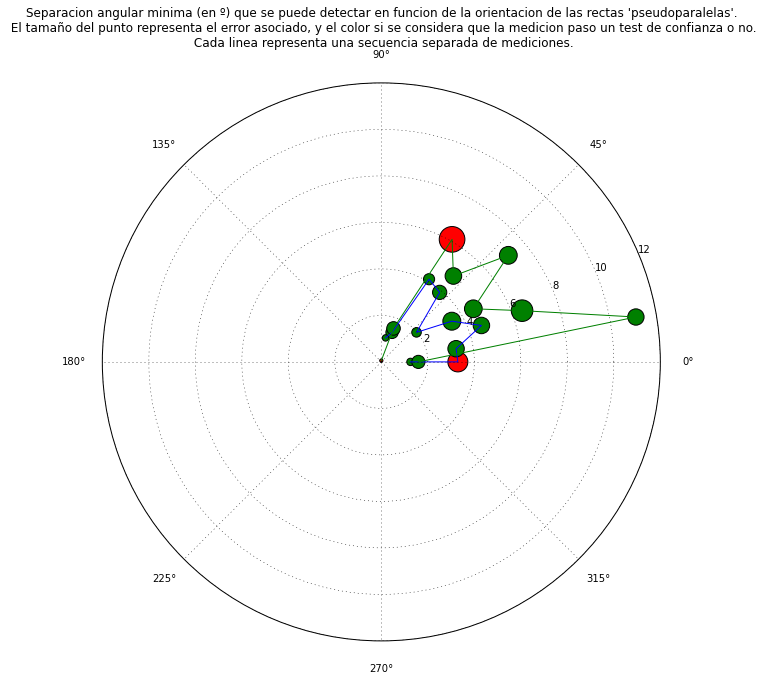

In [37]:
#DownloadFile()
#touchs, sounds = load(settings)
import pandas as pd

touchs1 = cargarTouchs('SegundaMedicionAcumulada')
touchs2 = cargarTouchs('DatosFiltradosPreliminares')

touchs = pd.concat([touchs1, touchs2], axis=0, ignore_index=True)

plotResumen(buscarUmbral(touchs))
buscarUmbral(touchs)





In [5]:
guardarComoSounds (sounds, 'Datos previos medicion umbral completa (sounds)')

'Archivo guardado'